# Customer Churn Analysis

#### by Sajad Abdul Manaf, 
#### Batch - 0522

<b>Problem Statement<b>

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

- <b>Dataset Link<b>:  https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

#### - Library Imports, Data Quality/Integrity Checks, Cleansing

In [2]:
import pandas as pd # data wrangling 
import numpy as np #Basic computation
import seaborn as sns # Visualization 
import matplotlib.pyplot as plt # plot package
%matplotlib inline
import warnings # Filter warnings
warnings.filterwarnings('ignore')

In [3]:
# importing the Data set

df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Data Set Dimension Checks

print('No. of Rows:', df.shape[0])
print('No. of Columns:', df.shape[1])
pd.set_option('display.max_columns',None) # If any truncated columns

No. of Rows: 7043
No. of Columns: 21


In [6]:
# Lets inspect the features using series, as we have more columns

df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Dataset contains, 7043 entries of rows and 21 columns
- Identified target variable -  Churn, which is marked as Object type, but having close look at the values its identified, this problem is of classification type
- Lots of features are primaface, neumeric data types, but are shown as object data type, seems some miscasted data or whitespaces are present.
-  Example - Total Charges, etc
- Customer ID is unnecessary, sure this will not contribute the prediction, which can be deleted

In [8]:
# dropping customer ID column
df.drop(['customerID'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### Duplicate Value Check

In [10]:
# Duplicate Value Check

df.duplicated().sum()

22

In [11]:
#Removing duplicate values
df.drop_duplicates(keep='last',inplace= True)

In [12]:
df.shape

(7021, 20)

- 22 rows of record removed

#### White space, special Character Check

- some features are miscasted, and marked as diffrent data types

In [13]:
df.isin([' ','NA','-']).sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- As we suspected - Total charges feature having some spaces, we need to treat it

In [14]:
df['TotalCharges'].isin([' ']).sum().any()

True

In [15]:
#Replaceing Whitespaces with np.NaN
df['TotalCharges']= df['TotalCharges'].replace(' ',np.nan)

In [16]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
# Converting TotalCharges datatype into float
df['TotalCharges']= df['TotalCharges'].astype(float)

In [18]:
df['TotalCharges'].dtypes

dtype('float64')

- Need to remove the whitesspaces, can check the % value of data and missing

In [19]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
TotalCharges                  11        0.156673
gender                         0        0.000000
SeniorCitizen                  0        0.000000
MonthlyCharges                 0        0.000000
PaymentMethod                  0        0.000000
PaperlessBilling               0        0.000000
Contract                       0        0.000000
StreamingMovies                0        0.000000
StreamingTV                    0        0.000000
TechSupport                    0        0.000000
DeviceProtection               0        0.000000
OnlineBackup                   0        0.000000
OnlineSecurity                 0        0.000000
InternetService                0        0.000000
MultipleLines                  0        0.000000
PhoneService                   0        0.000000
tenure                         0        0.000000
Dependents                     0        0.000000
Partner                        0        0.000000
Churn               

- Before applying/choosing fillna imputation, lets check the data outliers peripherally for TotalCharges

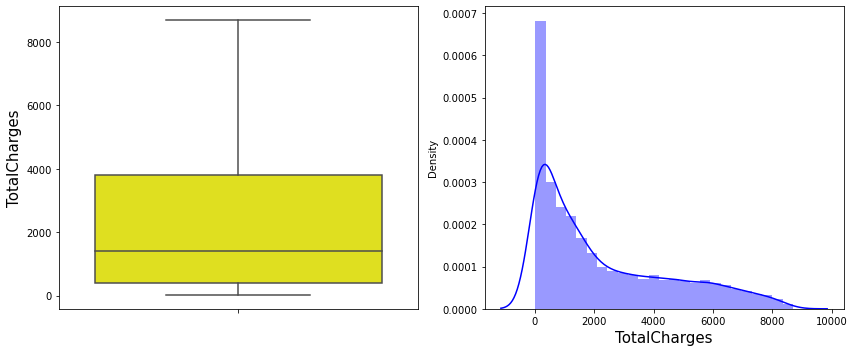

Mean of TotalCharges: 2290.353388017122
Median of TotalCharges: 1403.875


In [20]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges', data=df,color='yellow')
plt.ylabel('TotalCharges',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'], color='b')
plt.xlabel('TotalCharges',fontsize=15)
plt.tight_layout()
plt.show()

print("Mean of TotalCharges:",df['TotalCharges'].mean())
print("Median of TotalCharges:",df['TotalCharges'].median())

- No Outliers, but TotalCharges feature has some right skewness, which means, mean safe imputation

In [21]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

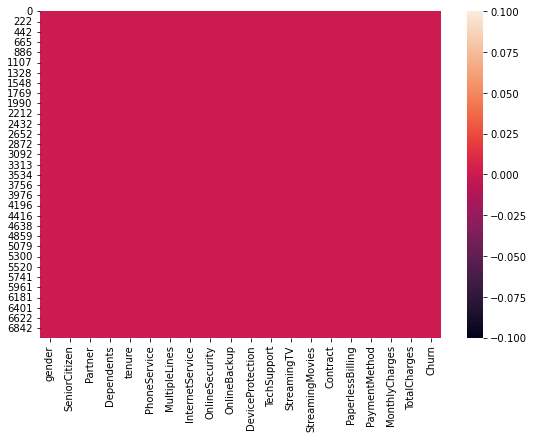

In [22]:
#Null Check after Imputation

plt.figure(figsize=(9,6))
sns.heatmap(df.isnull())
plt.show()

- No Null values

#### -EDA statistical Analysis

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7021.0,0.162512,0.368947,0.00,0.00,0.00,0.0,1.00
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.00,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.40,89.9,118.75
TotalCharges,7021.0,2290.353388,2265.044136,18.80,411.15,1410.25,3801.7,8684.80


In [24]:
# spliting into Numerical & Categorical 
Categorical = [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen', 'Churn']
Numerical = ['tenure','MonthlyCharges','TotalCharges']

In [25]:
df[Categorical].describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7021,2,Male,3541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,7021,2,No,3619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7021,2,No,4911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhoneService,7021,2,Yes,6339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7021,3,No,3368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7021,3,Fiber optic,3090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7021,3,No,3490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7021,3,No,3080,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceProtection,7021,3,No,3087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TechSupport,7021,3,No,3465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Takling Value counts of each categprical Fetures

In [26]:
for i in Categorical:
    print(i)
    print(df[i].value_counts())
    print("-*-"*40)

gender
Male      3541
Female    3480
Name: gender, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Partner
No     3619
Yes    3402
Name: Partner, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
InternetServ

- Lets now plot the count plot for all the categorical features

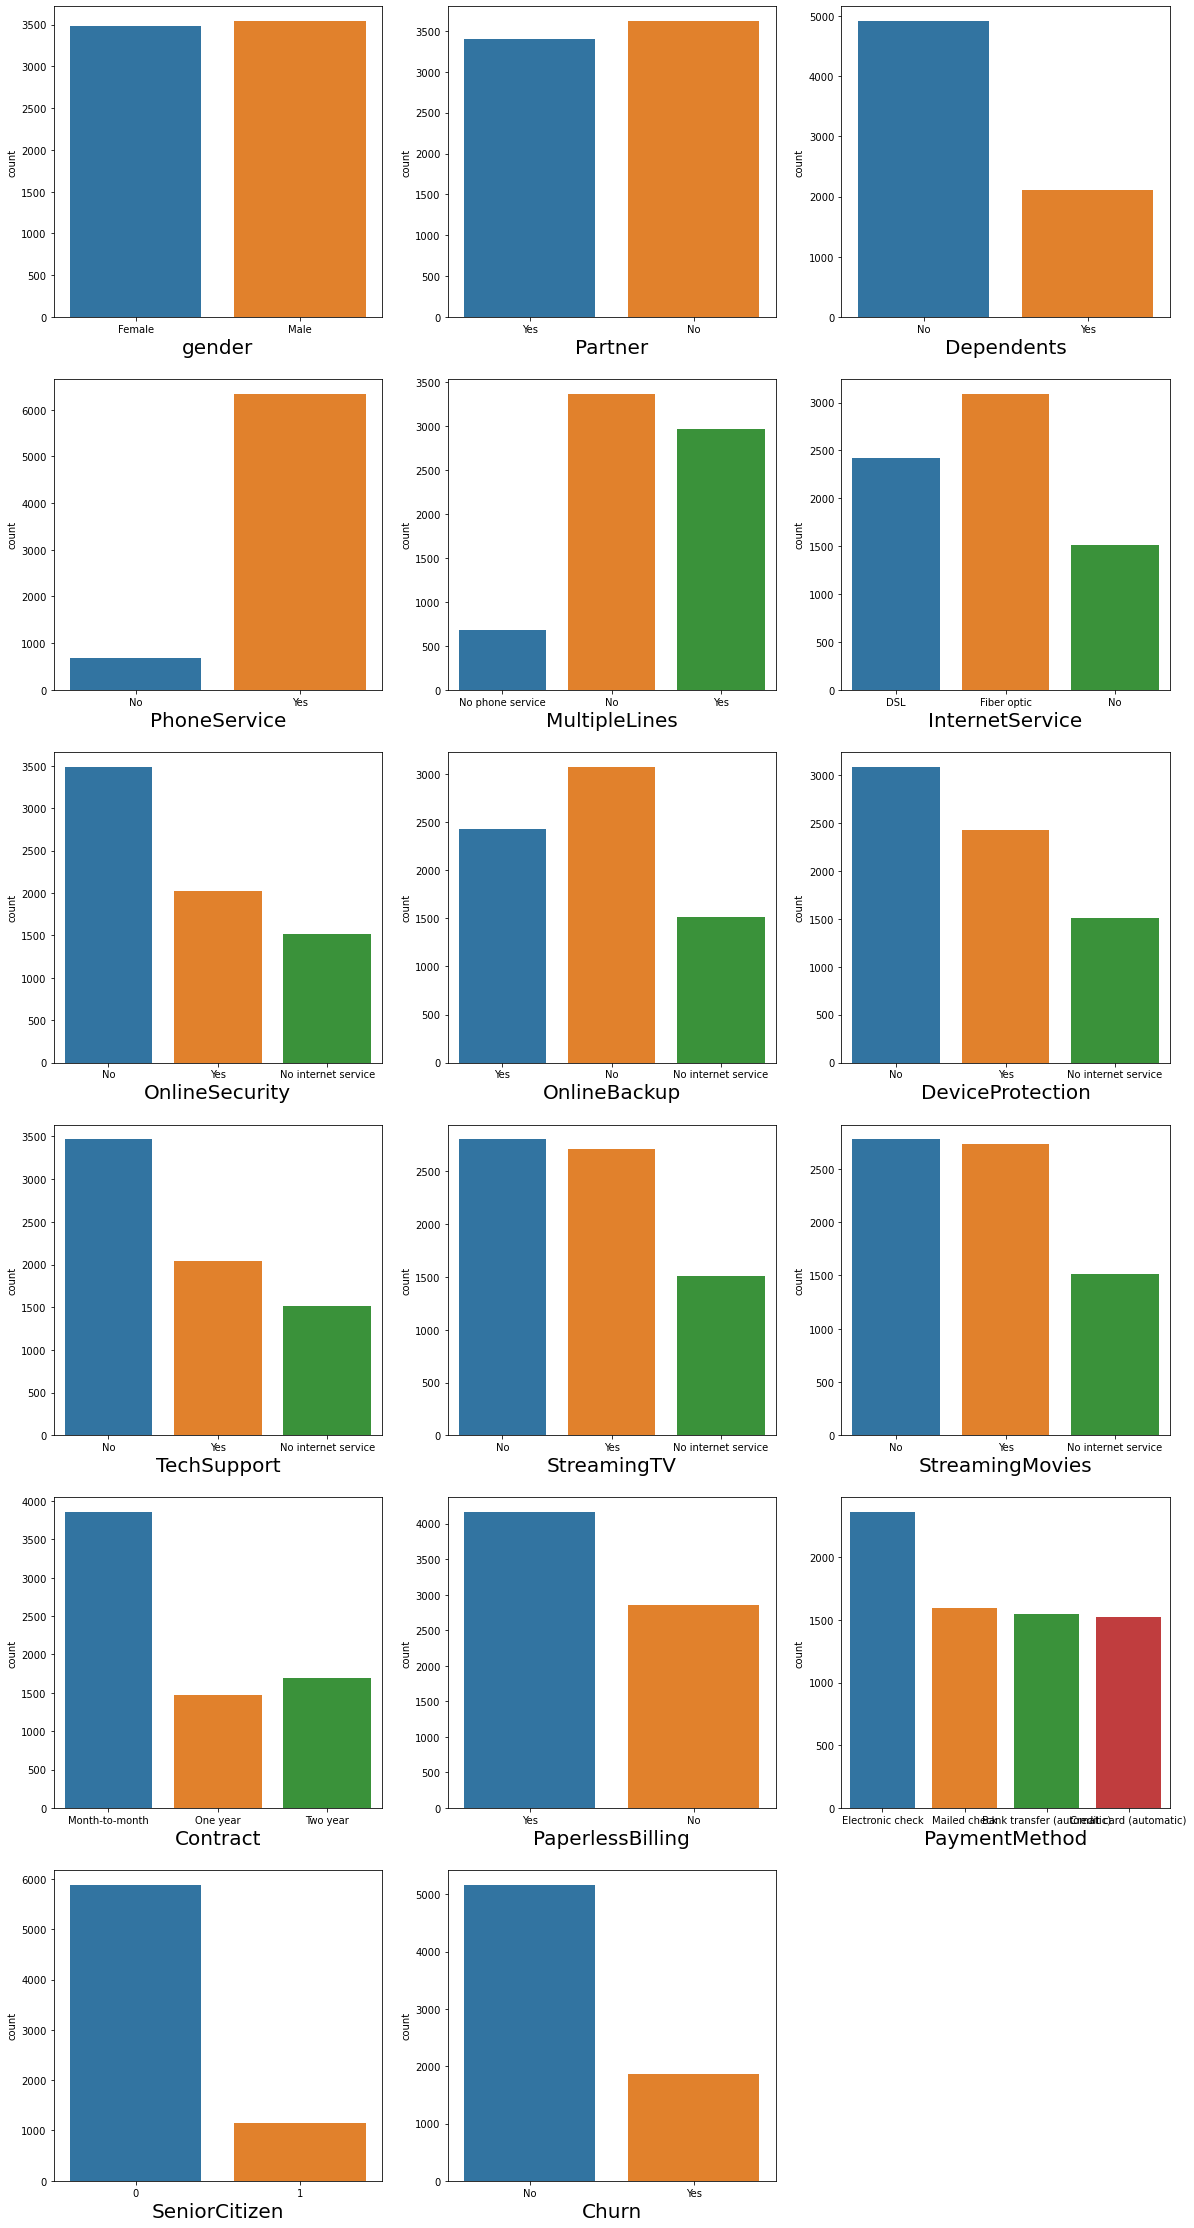

In [27]:
plt.figure(figsize=(20,40), facecolor='white')
pltnum =1
for i in Categorical:
    if pltnum <=18:
        ax = plt.subplot(6,3,pltnum)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    pltnum+=1
plt.show()

- Churn is the Target variable, lets analyze the variable

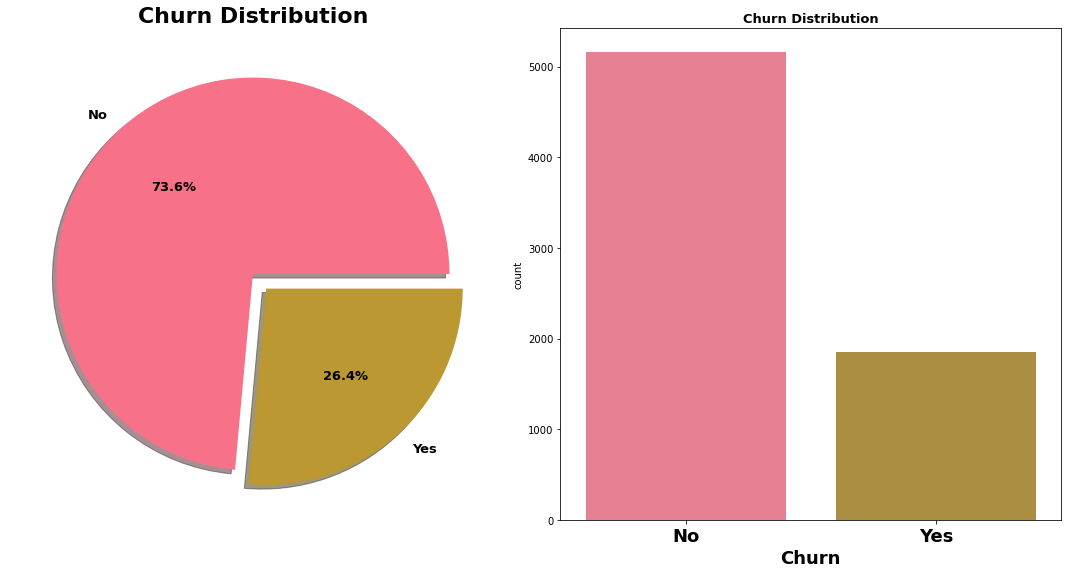

In [28]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Churn Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Churn',data=df,ax=ax[1])
ax[1].set_title('Churn Distribution',fontsize=13,fontweight ='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

- It is evident that 26.4% of the customers opted for churning, 
- Also can say that the dataset is imbalanced, we need to either over sample or undersmaple the dataset

<b>Lets inspect Individual Relationship with features<b>

- Gender v/s Churn rate

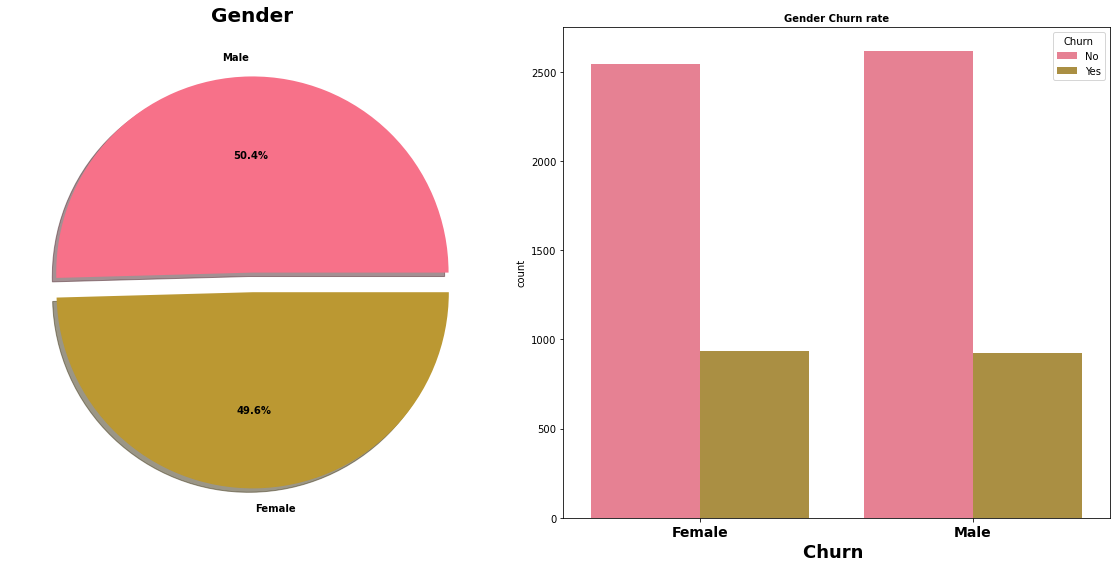

In [29]:
plt.rcParams["figure.autolayout"] = True

fig,ax=plt.subplots(1,2,figsize=(16,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':10}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('gender',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Gender Churn rate',fontsize=10,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- Gender to Chrun rate are equally weighing, like Almost the data equally ditributed and Churn rate also almost equal

<b>Senior Citizen v/s Churn<b>

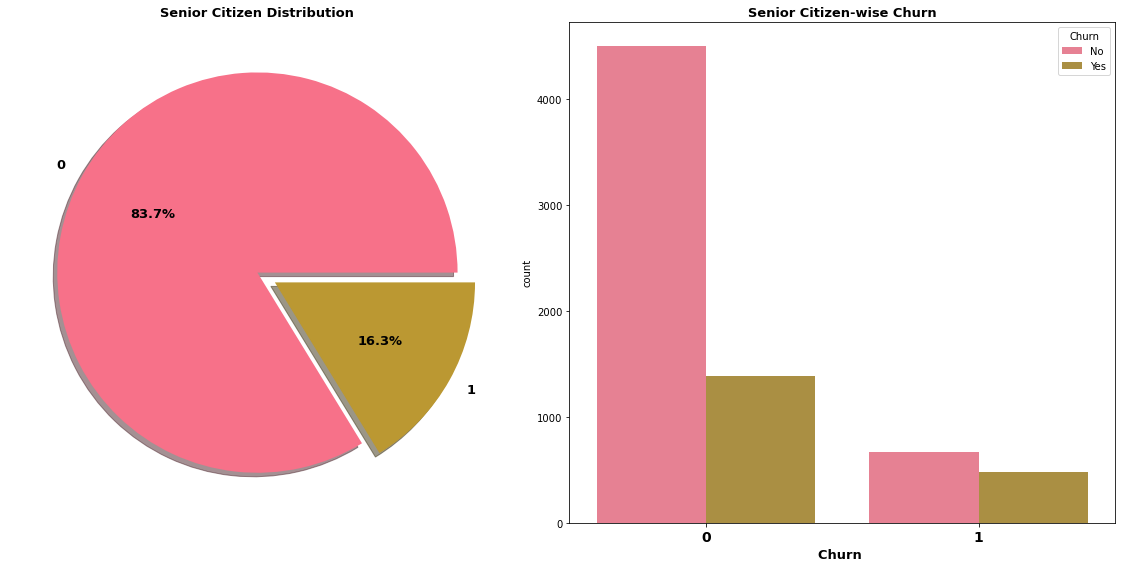

In [71]:
plt.rcParams["figure.autolayout"] = True
f,ax=plt.subplots(1,2,figsize=(16,8))
df['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Senior Citizen Distribution', fontsize=13,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('SeniorCitizen',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Senior Citizen-wise Churn',fontsize=13,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=13,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- 16.3 are Senior Citizens, among those more than 50% rate churn rate is observed for senior citizens and chrn rate is less for youngsters compared to senior citizens

<b>Tenure V/s Senior Citizen<b>

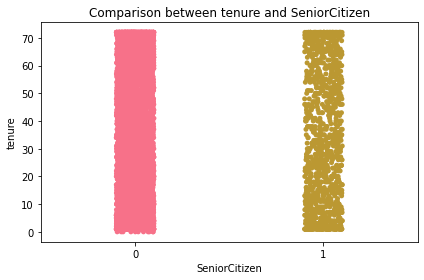

In [56]:
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen",y="tenure",data = df)
plt.show()

- No Relationship between Senior citizen and tenure

<b>Partner v/s Chrun<b>

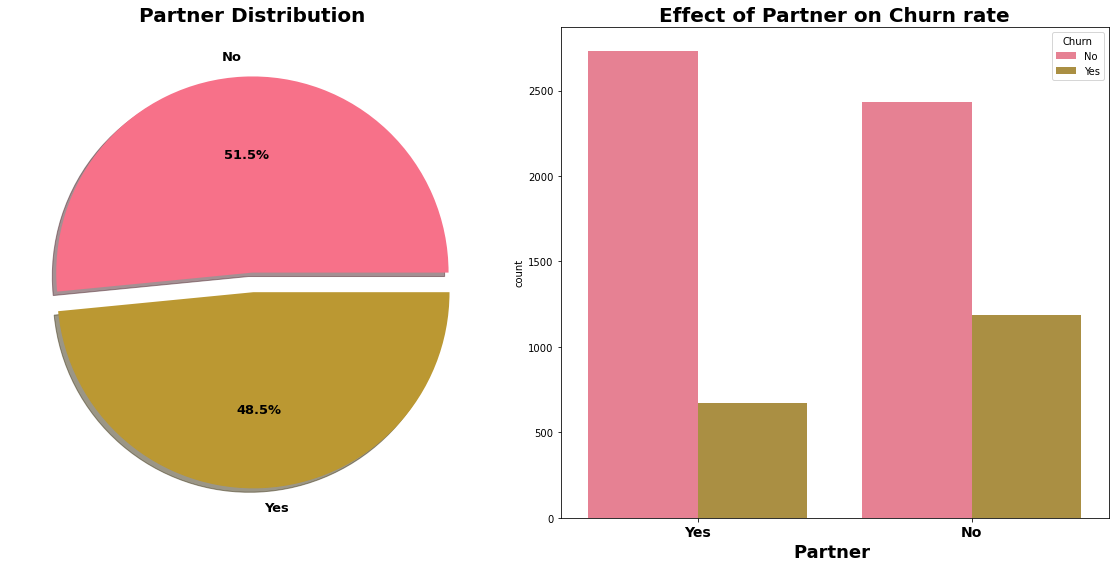

In [70]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Partner Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Partner',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Partner on Churn rate',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Partner ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- Customers are having Partners are showing less tendency to churn

<b>Dependants v/s Churn<b>

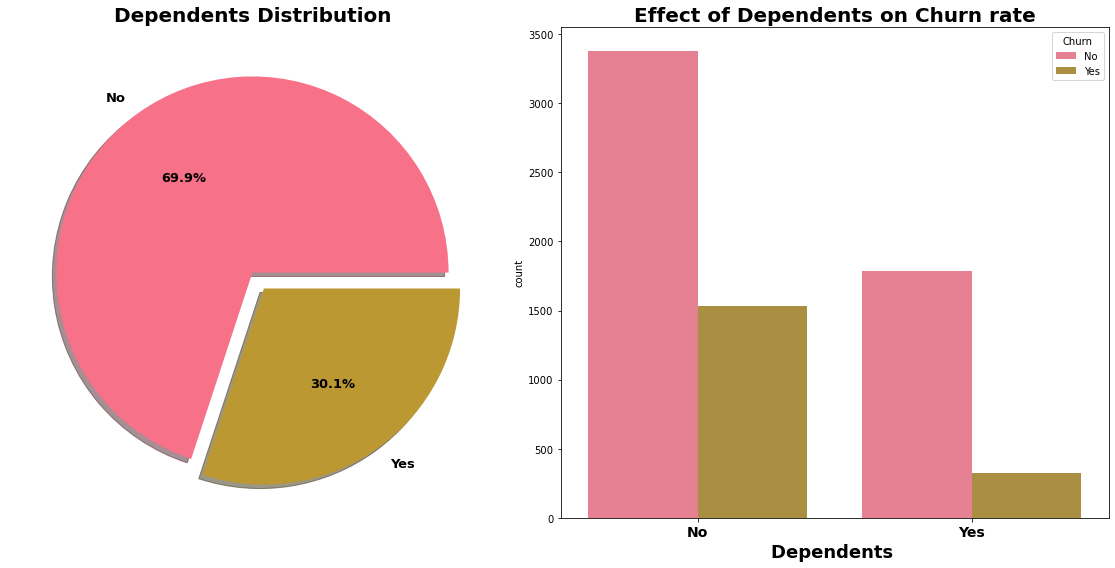

In [69]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Dependents Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Dependents on Churn rate',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- Customers are having no dependants are having high rate pf chrun

<b> Streaming TV v/s Chrun<b>

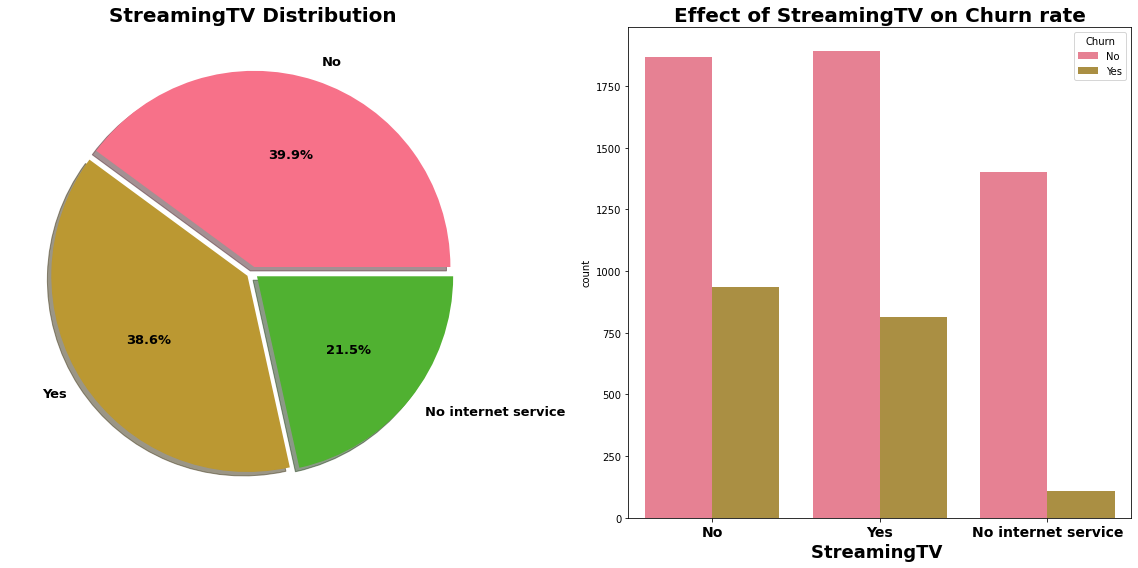

In [68]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingTV Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingTV',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingTV on Churn rate',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingTV ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- High Rate of Chrun for No Internet streaming cases, but sreaming TV cases chrun rate also high, seems less impact om streaming TV feature to churn, lets check in later parts

<b>Internet Service v/s Churn<b>

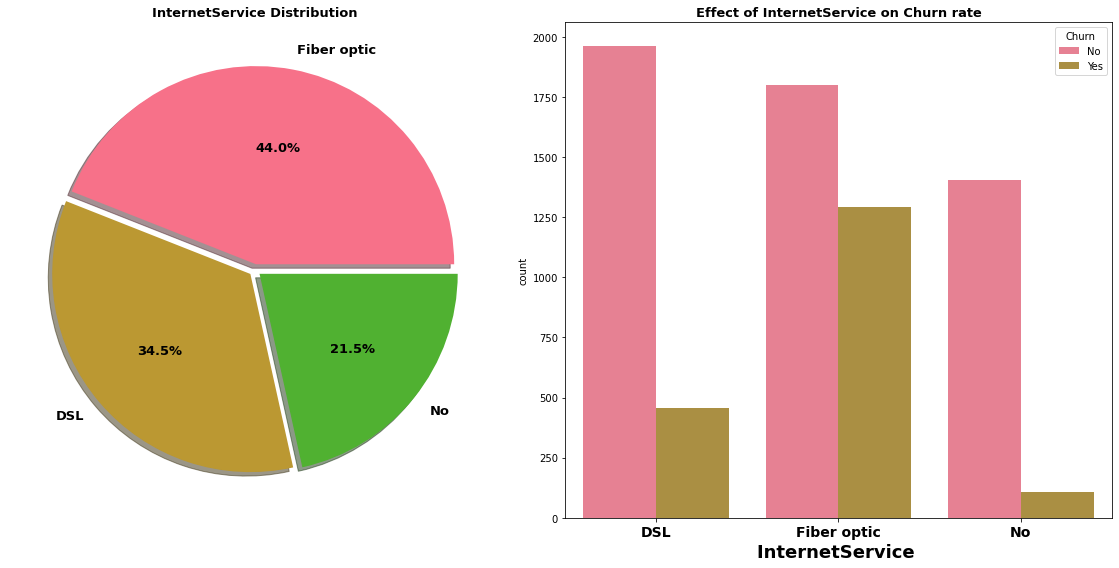

In [67]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('InternetService Distribution', fontsize=13,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('InternetService',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of InternetService on Churn rate',fontsize=13,fontweight ='bold')
ax[1].set_xlabel("InternetService ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- Churn rate is high for consumers are having options for alterante internet options, high for Fiber Optic and less for no internet consumers

<b>Internet Service, Monthly Charges v/s Churn<b>

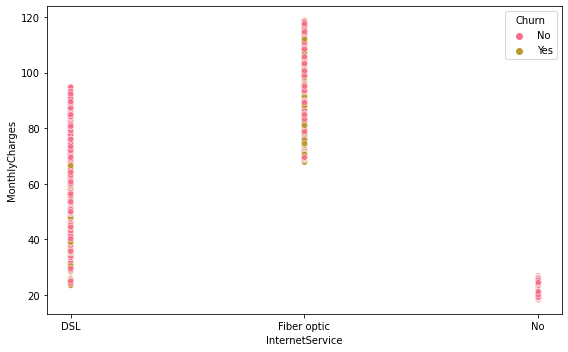

In [61]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="InternetService", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

- The churn rate is high for customers with Fiber Optic internet facility, this is due to high in monthly charges

<b>Streaming Movies v/s Churn <b>

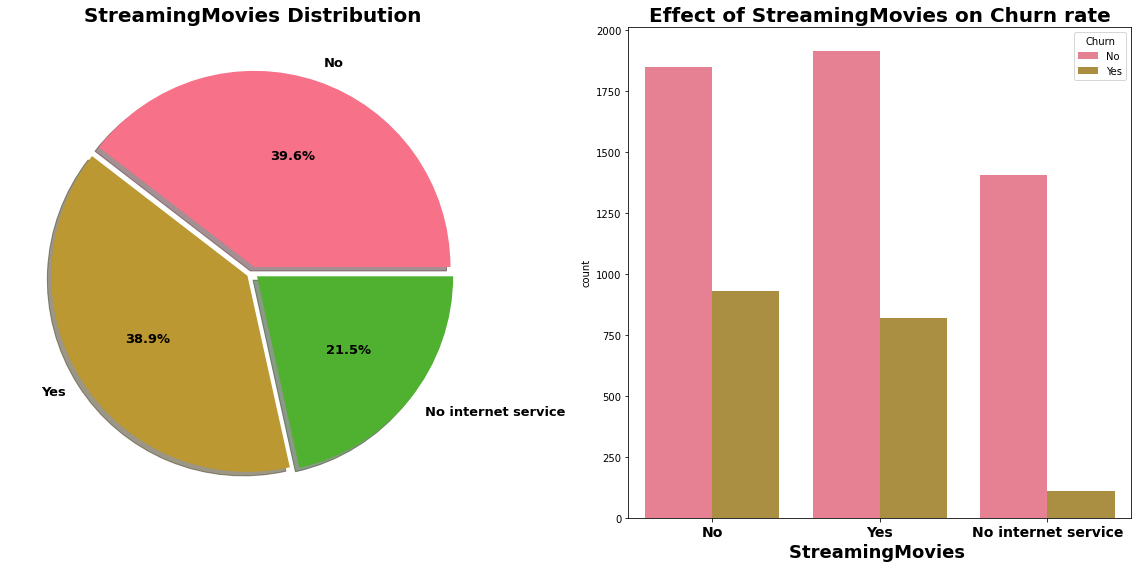

In [66]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingMovies'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingMovies Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingMovies',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingMovies on Churn rate',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingMovies ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- same behaviour as seen in streaming TV distribution

<b> Contract distribution v/s Churn<b>

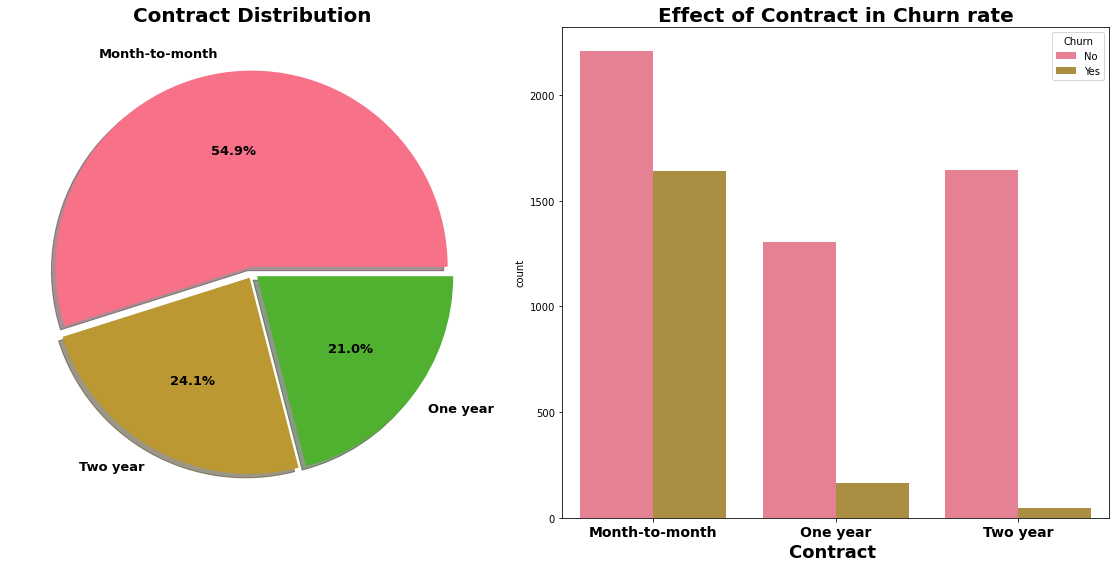

In [65]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Contract Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Contract',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Contract in Churn rate',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Contract ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- High churn rate for Month-Months contract holders, Yearly contract holders are havong very poor chgurn rate

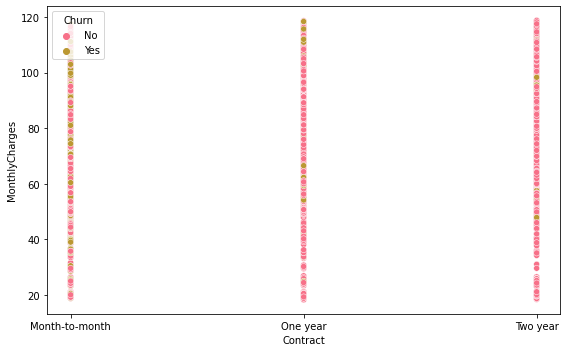

In [64]:
#Contract v/s Monthly charges and Churn
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

<b>Paperless Biling V/s Churn

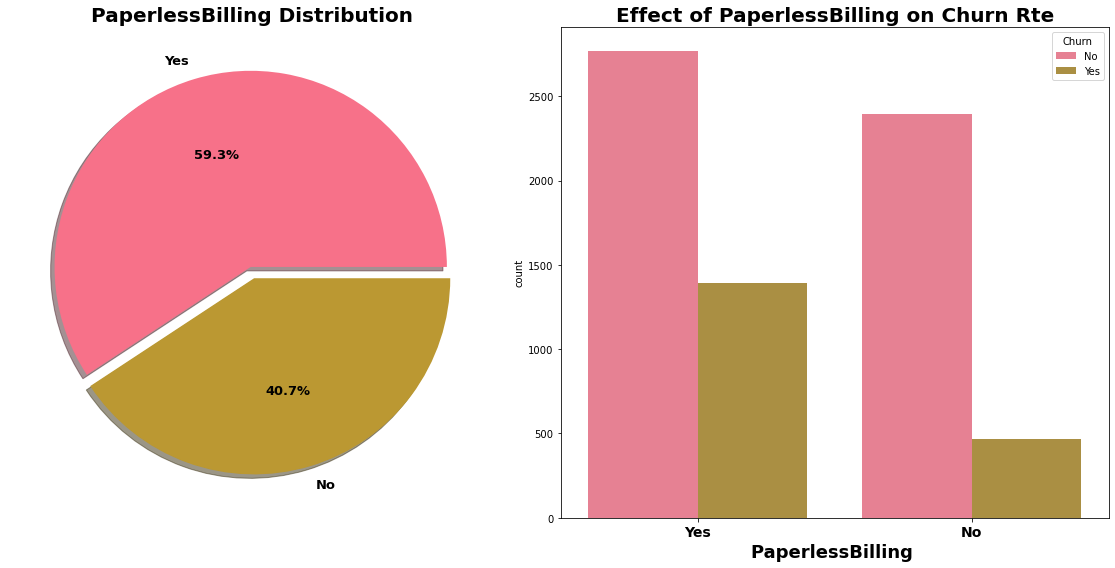

In [73]:
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaperlessBilling'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('PaperlessBilling Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaperlessBilling',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaperlessBilling on Churn Rte',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("PaperlessBilling ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

- Churn rate is more for Paperless billing opted Yes customers

<b>Payment MOthed V/s Churn<b>

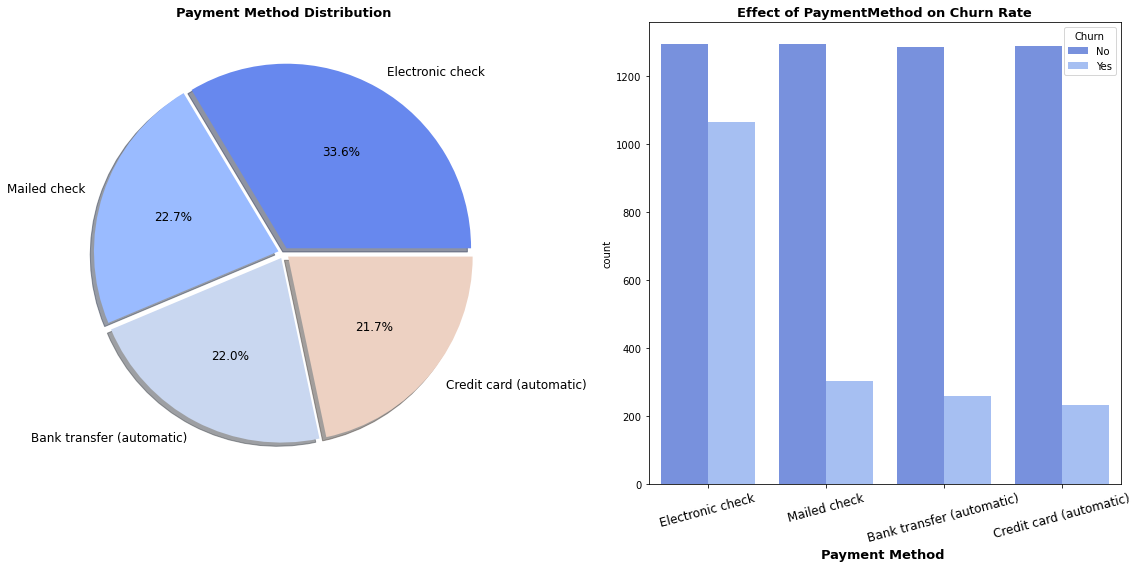

In [78]:

f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaymentMethod'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Payment Method Distribution', fontsize=13,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaymentMethod',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaymentMethod on Churn Rate',fontsize=13,fontweight ='bold')
ax[1].set_xlabel("Payment Method ",fontsize=13,fontweight ='bold')
plt.xticks(fontsize=12,rotation=15)
plt.tight_layout()
plt.show()

- High Churn rate for ELectronic check payment holders(they are the predominant payment holders) - 

<b>Monthly charges, Total Charges V/s churn<b>

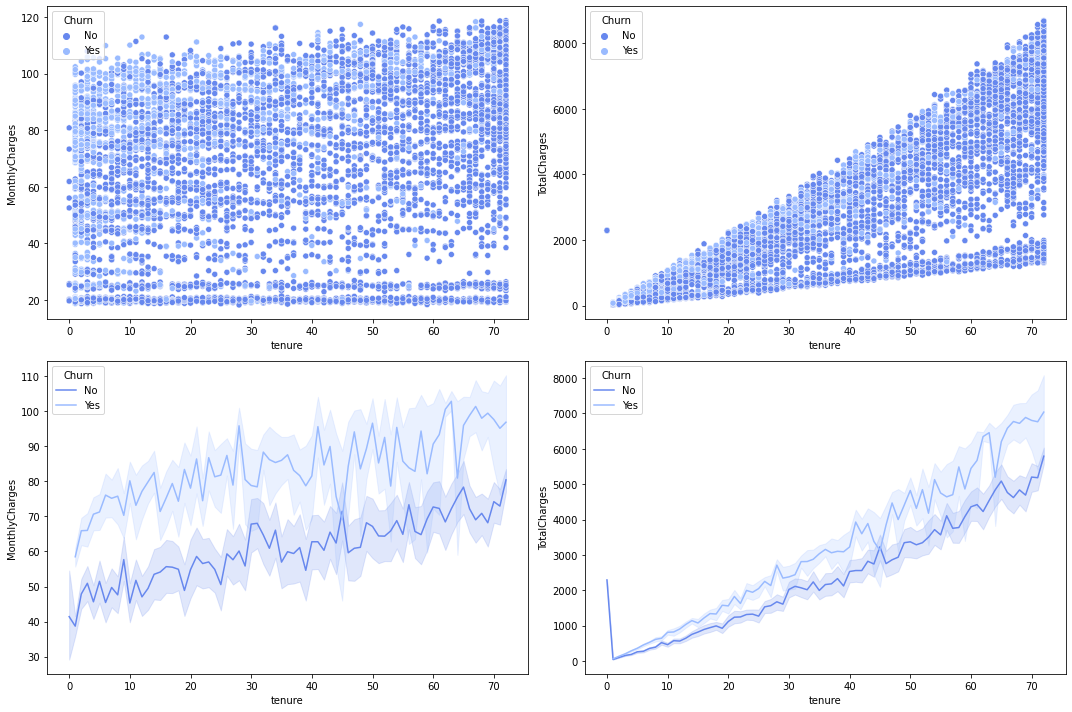

In [79]:

fig , ax=plt.subplots(2,2, figsize=(15,10))
for i,col in enumerate(["MonthlyCharges","TotalCharges"]):
    sns.scatterplot(ax=ax[0,i],x="tenure", y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")

- Consumers are having high monthly charges and Total charges are highlky opting to churn

<b>Pair plot<b>

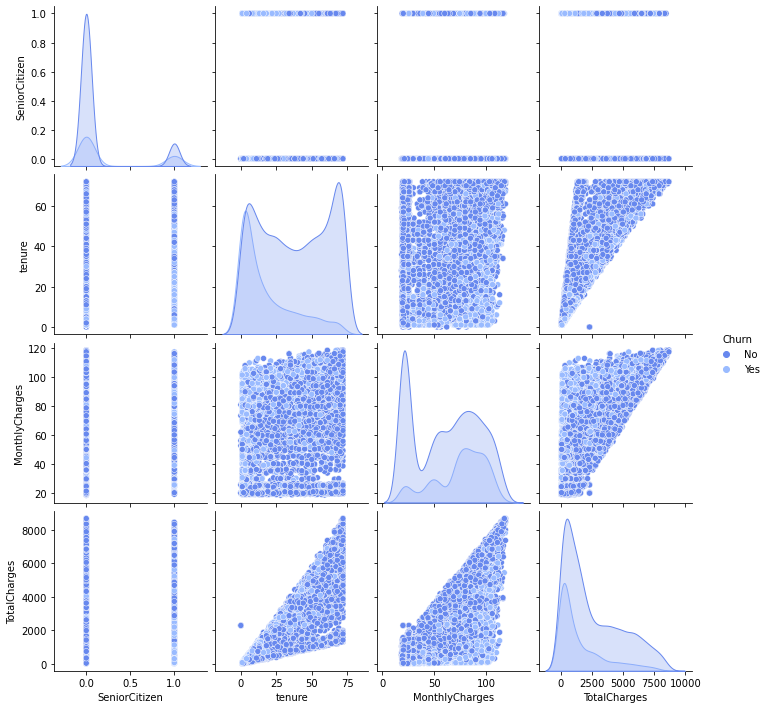

In [81]:
sns.pairplot(df,hue="Churn")
plt.show()

<b>Encoding<b>

In [30]:
#feature checks
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [31]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
#feature split
Category =['gender', 'Partner','PhoneService', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical =['tenure','MonthlyCharges', 'TotalCharges']

In [33]:
# feture encoding Label Encoder for categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#### Feature Selction and Engineering

<b>Outliers Check<b>

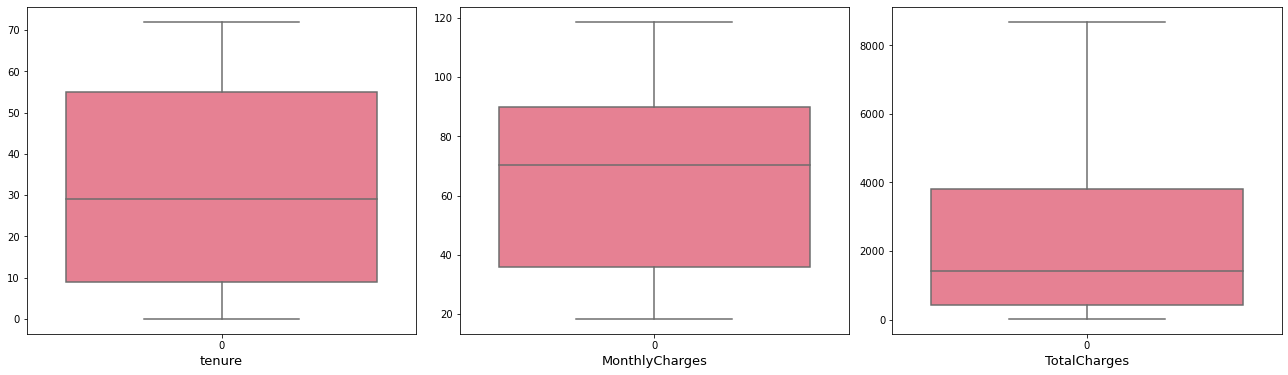

In [34]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(data= df[column])
        plt.xlabel(column,fontsize=13)
    plotnumber+=1
plt.show()

- No outliers as per Box plot

<b>Outliers Check using Zscore<b>

In [35]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataset before removing outliers: ", df.shape)
print ("Shape of the dataset after removing outliers: ", df1.shape)
print ("Percentage data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataset before removing outliers:  (7021, 20)
Shape of the dataset after removing outliers:  (6339, 20)
Percentage data loss post outlier removal:  9.713715994872524


In [36]:
#Re assigning the dataset
df=df1.copy()

In [37]:
#dropping the less apriority feature Phone service - no importance

df.drop(['PhoneService'],axis=1,inplace=True)

<b>Skewnes Check<b>

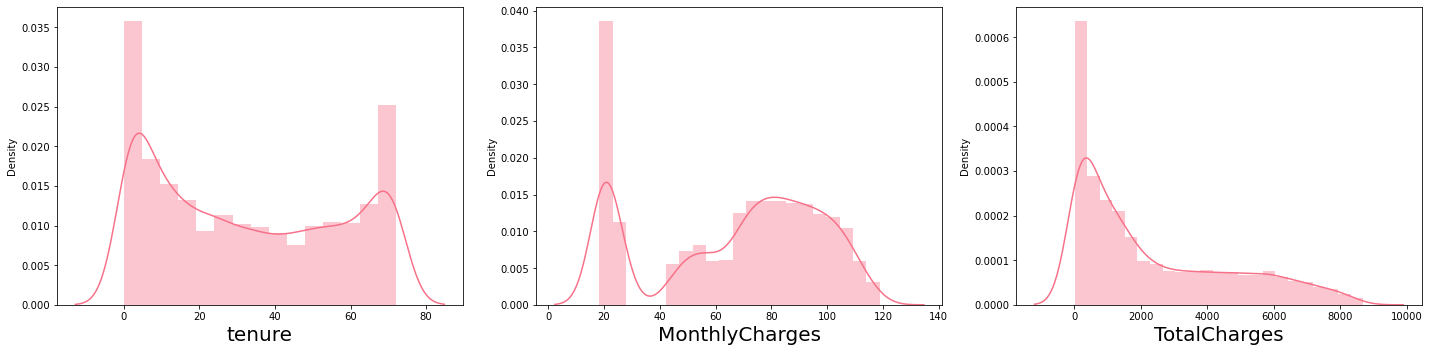

In [38]:
plt.figure(figsize=(20,5),facecolor='white')
plotnum=1
for col in Numerical:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

- fetaures are having skewness
-No Skewness check is required for categorical data

In [39]:
# Skewness check using .skew method

df.skew()

gender             -0.012939
SeniorCitizen       1.819335
Partner             0.049562
Dependents          0.871194
tenure              0.233517
MultipleLines       0.125532
InternetService     0.051965
OnlineSecurity      0.421216
OnlineBackup        0.166121
DeviceProtection    0.181524
TechSupport         0.408970
StreamingTV        -0.005185
StreamingMovies    -0.012505
Contract            0.624212
PaperlessBilling   -0.388673
PaymentMethod      -0.165613
MonthlyCharges     -0.404120
TotalCharges        0.895850
Churn               1.058644
dtype: float64

- Total Charges are having skewness in the data, we need to treat skewness

In [40]:
#remove the skewness of data using log transformation

df['TotalCharges'] = np.log1p(df['TotalCharges'])

#### Correlation Check

In [41]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.005846,-0.002207,0.015722,0.001891,-0.006391,0.000983,-0.016826,-0.009353,-0.003121,-0.009769,-0.005624,-0.002760,0.000674,-0.018131,0.021961,-0.011639,-0.006783,-0.011391
SeniorCitizen,-0.005846,1.000000,0.013943,-0.213486,0.017647,0.152954,-0.039479,-0.123668,-0.020710,-0.023590,-0.144694,0.028453,0.047062,-0.141107,0.155193,-0.041891,0.238426,0.111597,0.149599
Partner,-0.002207,0.013943,1.000000,0.453409,0.382932,0.147545,-0.004099,0.151348,0.154738,0.167390,0.132266,0.133353,0.127676,0.297393,-0.010458,-0.147854,0.088571,0.337926,-0.153262
Dependents,0.015722,-0.213486,0.453409,1.000000,0.159194,-0.028535,0.053701,0.146427,0.090389,0.082944,0.130166,0.048859,0.023932,0.242286,-0.106970,-0.037411,-0.131791,0.084275,-0.158628
tenure,0.001891,0.017647,0.382932,0.159194,1.000000,0.358098,-0.034932,0.326356,0.377187,0.367678,0.324457,0.282710,0.292966,0.674586,0.002370,-0.361878,0.242184,0.827354,-0.348882
MultipleLines,-0.006391,0.152954,0.147545,-0.028535,0.358098,1.000000,-0.107675,0.006752,0.125043,0.130055,0.011287,0.187307,0.193380,0.114261,0.174017,-0.183244,0.454819,0.458583,0.042438
InternetService,0.000983,-0.039479,-0.004099,0.053701,-0.034932,-0.107675,1.000000,-0.027406,0.030417,0.049829,-0.022841,0.099513,0.094169,0.115528,-0.164085,0.096674,-0.470605,-0.260767,-0.058968
OnlineSecurity,-0.016826,-0.123668,0.151348,0.146427,0.326356,0.006752,-0.027406,1.000000,0.198167,0.173275,0.283252,0.046717,0.062345,0.367667,-0.154346,-0.089597,-0.071808,0.207795,-0.289182
OnlineBackup,-0.009353,-0.020710,0.154738,0.090389,0.377187,0.125043,0.030417,0.198167,1.000000,0.195604,0.210090,0.151646,0.139587,0.286126,-0.019141,-0.126394,0.110079,0.310079,-0.201206
DeviceProtection,-0.003121,-0.023590,0.167390,0.082944,0.367678,0.130055,0.049829,0.173275,0.195604,1.000000,0.241956,0.278088,0.284397,0.342751,-0.040732,-0.132907,0.154859,0.318027,-0.176171


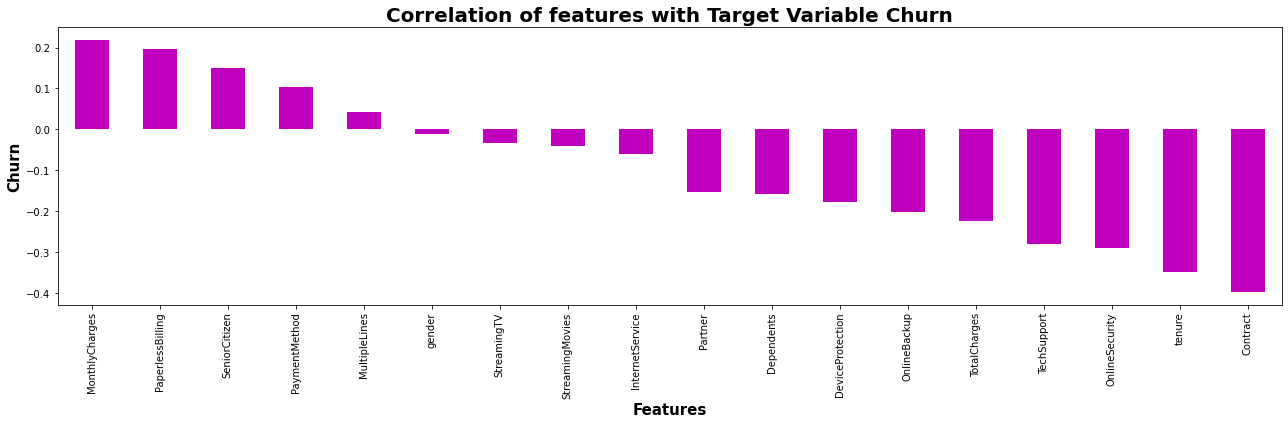

In [43]:
#Correlation in ascending order

plt.figure(figsize = (18,6))
df.corr()['Churn'].drop(['Churn']).sort_values(ascending=False).plot(kind='bar',color = 'm')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Churn',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Churn',fontsize = 20,fontweight='bold')
plt.show()

<b>Balancing the Target Variable - Churn<b>

In [44]:
#We already seen that target variable Churn needs to be balanced
df.Churn.value_counts()

0    4652
1    1687
Name: Churn, dtype: int64

In [45]:
#Balancing using SMOTE

from imblearn.over_sampling import SMOTE

In [46]:
# Split of data in target and dependent features
X = df.drop(['Churn'], axis =1)
Y = df['Churn']

In [47]:
# Oversampling using SMOTE Technique
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [48]:
Y.value_counts()

0    4652
1    4652
Name: Churn, dtype: int64

dataset is now balanced

<b> Standard Scaling<b>

In [49]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

<b>Multi Colinearity Check using VIF<b>

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.015296,gender
1,1.098935,SeniorCitizen
2,1.539609,Partner
3,1.438500,Dependents
4,6.531662,tenure
5,1.431870,MultipleLines
6,1.464471,InternetService
7,1.345419,OnlineSecurity
8,1.256557,OnlineBackup
9,1.312330,DeviceProtection


<b>PCA<b>

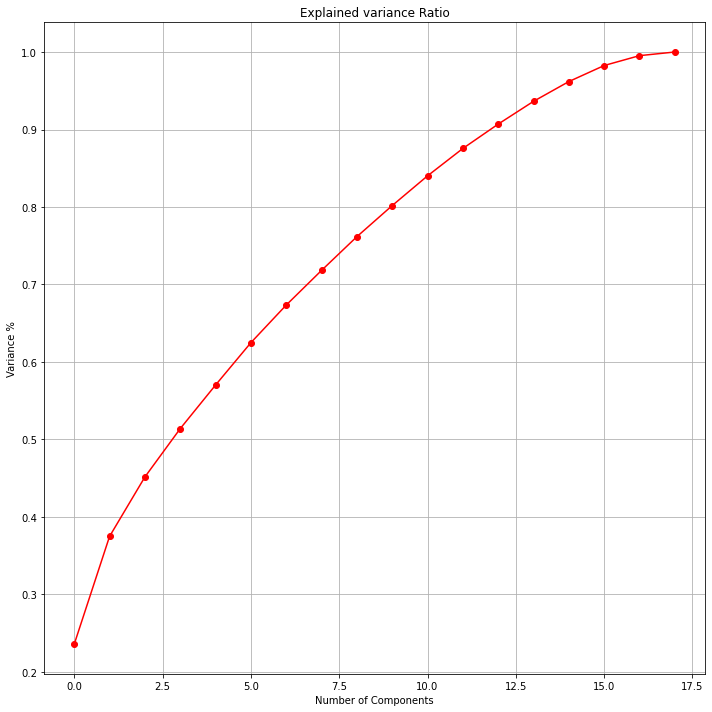

In [53]:
# Lets do PCA for highest contributing features to outcome

from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

- 13 features are contribuing 90% of data variation in the data, so we can choose those 13

In [54]:
pca_new = PCA(n_components=13)
x_new = pca_new.fit_transform(X_scale)

In [55]:
principle_x=pd.DataFrame(x_new,columns=np.arange(13))

#### ML Model Building

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6512, 13)
Training target vector size: (6512,)
Test feature matrix size: (2792, 13)
Test target vector size: (2792,)


<b>Finding Best Random State<b>

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8151862464183381 on Random_state 150


In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=150, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('Logistics Regression Outcome')
print('\n')
print('Accuracy Score of Logistics Regression :\n', accuracy_score(Y_test, y_pred))
print('\n')
print('Confusion matrix of Logistics Regression :\n',confusion_matrix(Y_test, y_pred))
print('\n')
print('classification Report - Logistics Regression\n',classification_report(Y_test, y_pred))

Logistics Regression Outcome


Accuracy Score of Logistics Regression :
 0.8151862464183381


Confusion matrix of Logistics Regression :
 [[1079  300]
 [ 216 1197]]


classification Report - Logistics Regression
               precision    recall  f1-score   support

           0       0.83      0.78      0.81      1379
           1       0.80      0.85      0.82      1413

    accuracy                           0.82      2792
   macro avg       0.82      0.81      0.81      2792
weighted avg       0.82      0.82      0.81      2792



<b>For KNN optimal Value <b>

In [66]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4666530220409407
RMSE value for k=  2 is: 0.4850929666016797
RMSE value for k=  3 is: 0.4627995042011445
RMSE value for k=  4 is: 0.4670366250831453
RMSE value for k=  5 is: 0.4589136293440278
RMSE value for k=  6 is: 0.4565662296568125
RMSE value for k=  7 is: 0.4534174594676999
RMSE value for k=  8 is: 0.4518348457054815
RMSE value for k=  9 is: 0.4585232306095254
RMSE value for k=  10 is: 0.4518348457054815
RMSE value for k=  11 is: 0.44905185053612023
RMSE value for k=  12 is: 0.4498487488569214
RMSE value for k=  13 is: 0.4530223243517162
RMSE value for k=  14 is: 0.443433464932846
RMSE value for k=  15 is: 0.45538799226121673
RMSE value for k=  16 is: 0.4470533900155051
RMSE value for k=  17 is: 0.45460080413201925
RMSE value for k=  18 is: 0.4518348457054815
RMSE value for k=  19 is: 0.45420669846267875
RMSE value for k=  20 is: 0.44383713680973264


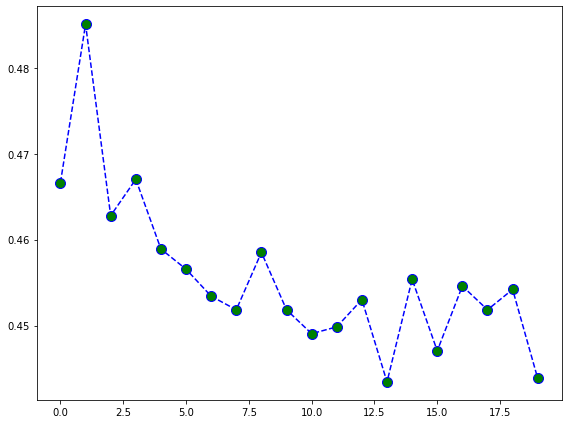

In [67]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.show()

k=14 RMSE we got minimal

<b> Other Classification Algorithms<b>

In [73]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 14),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('Classification ML Algorithm Evaluation Matrix',m,'is')
    print('\n')
    print('Accuracy Score :\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('Confusion matrix :\n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('Classification Report \n:',classification_report(Y_test, y_pred))
    print('\n')
   

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8151862464183381


Confusion matrix :
 [[1079  300]
 [ 216 1197]]


Classification Report 
:               precision    recall  f1-score   support

           0       0.83      0.78      0.81      1379
           1       0.80      0.85      0.82      1413

    accuracy                           0.82      2792
   macro avg       0.82      0.81      0.81      2792
weighted avg       0.82      0.82      0.81      2792



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8345272206303725


Confusion matrix :
 [[1095  284]
 [ 178 1235]]


Classification Report 
:               precision    recall  f1-score   support

           0       0.86      0.79      0.83      1379
           1       0.81      0.87      0.84      1413

    accuracy                           0.83      2792
   macro avg       0.84      0.83      0.83      2792
weighted avg       0.84      0.83      0.83 

#### Cross Validation

In [75]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('Cross Validation Score', m, ':')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')



Cross Validation Score LogisticRegression() :
Score : [0.75282106 0.74476088 0.79419667 0.78721118 0.80107527]
Mean Score : 0.7760130118504909
Std deviation : 0.022797908258385405




Cross Validation Score SVC() :
Score : [0.75228372 0.74637292 0.81407845 0.81837722 0.83064516]
Mean Score : 0.7923514933005147
Std deviation : 0.03559567395562889




Cross Validation Score GaussianNB() :
Score : [0.71735626 0.71843095 0.7909726  0.79903278 0.80376344]
Mean Score : 0.7659112050984266
Std deviation : 0.03942045366886172




Cross Validation Score DecisionTreeClassifier() :
Score : [0.70177324 0.69747448 0.78667383 0.78721118 0.77043011]
Mean Score : 0.7487125663737267
Std deviation : 0.040554887420957655




Cross Validation Score KNeighborsClassifier(n_neighbors=18) :
Score : [0.75926921 0.75120903 0.79742074 0.80494358 0.81451613]
Mean Score : 0.7854717373593803
Std deviation : 0.025400841413658268




Cross Validation Score RandomForestClassifier() :
Score : [0.72810317 0.74314884 0.

- Random Forest Classifier gives highest accuracy, let take Random Forest Classifier for Hyper parameter tuning

#### Hyper Parameter Tuning using grid search CV

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [78]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.789 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.784 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.781 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.778 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [79]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'log2',
 'n_estimators': 70}

#### Final Model

In [80]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 70, max_depth=50 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Accuracy Score : 0.8524355300859598


#### Confusion Matrix

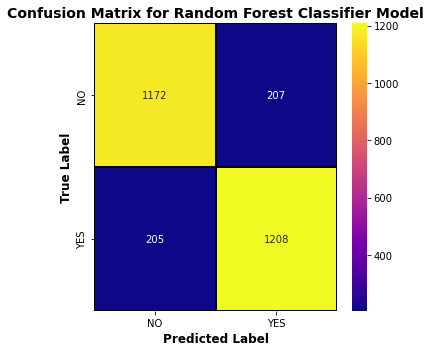

In [83]:
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=12,fontweight='bold')
plt.ylabel("True Label",fontsize=12,fontweight='bold')
plt.title('Confusion Matrix for Random Forest Classifier Model',fontsize=14,fontweight='bold')
plt.show()

#### AUC ROC Curve

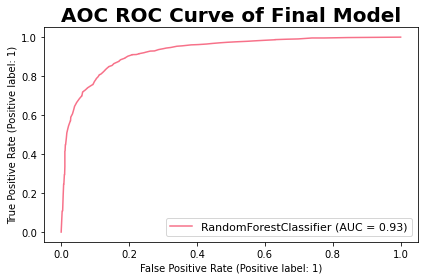

Auc Score : 0.8524049192030697


In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('Auc Score :',auc_score)

#### saving Model

In [85]:
import joblib
joblib.dump(Final_mod,'Customer_Churn.pkl')

['Customer_Churn.pkl']

#### Prediction

In [89]:
# Prediction
prediction = Final_mod.predict(X_test)

In [90]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,1,1
1,0,0
2,0,0
3,1,0
4,1,1
